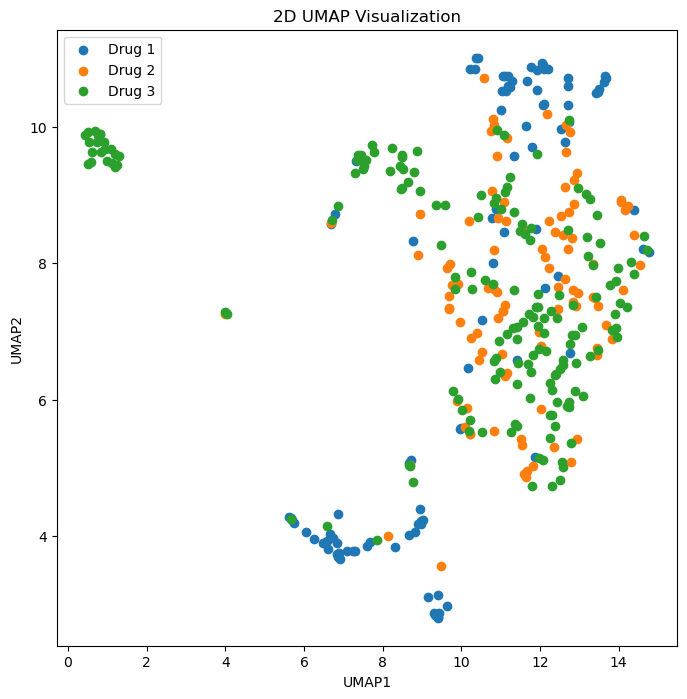

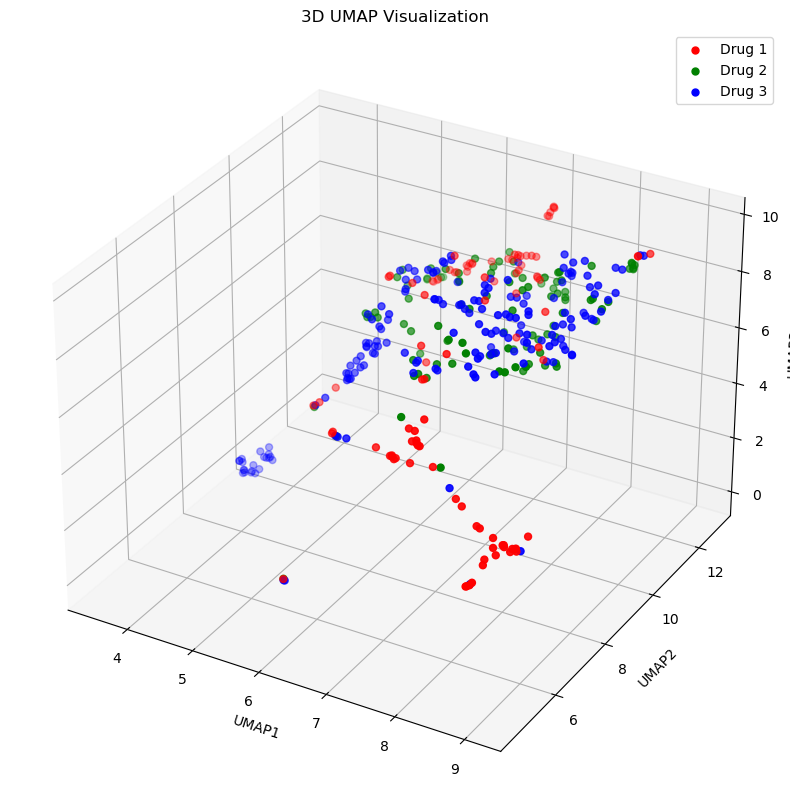

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from umap import UMAP

# Load data
data = pd.read_csv("dropped_correlation.csv")
data.drop('Unnamed: 0', inplace=True, axis=1)

# Create treatments dataframe
treatment1 = pd.DataFrame(['Drug 1']*100)
treatment2 = pd.DataFrame(['Drug 2']*100)
treatment3 = pd.DataFrame(['Drug 3']*184)
treatments = pd.concat([treatment1, treatment2, treatment3], axis=0)
treatments.columns = ['Treatments']

# Resetting the index
data = data.reset_index(drop=True)
treatments = treatments.reset_index(drop=True)
final = pd.concat([treatments, data], axis=1)

# Manually adjustable UMAP parameters
n_neighbors = 5# You can adjust this
min_dist = 0.1    # You can adjust this

# Perform UMAP for 2D visualization
umap_2d = UMAP(n_components=2, n_neighbors=n_neighbors, min_dist=min_dist)
umap_result_2d = umap_2d.fit_transform(data)

# Perform UMAP for 3D visualization
umap_3d = UMAP(n_components=3, n_neighbors=n_neighbors, min_dist=min_dist)
umap_result_3d = umap_3d.fit_transform(data)

# Create dataframes with UMAP components and treatment metadata
umap_df_2d = pd.DataFrame(data=umap_result_2d, columns=['UMAP1', 'UMAP2'])
final_umap_2d = pd.concat([treatments, umap_df_2d], axis=1)

umap_df_3d = pd.DataFrame(data=umap_result_3d, columns=['UMAP1', 'UMAP2', 'UMAP3'])
final_umap_3d = pd.concat([treatments, umap_df_3d], axis=1)

# Plot 2D UMAP
plt.figure(figsize=(8, 8))
for treat_group in final_umap_2d['Treatments'].unique():
    indicesToKeep = final_umap_2d['Treatments'] == treat_group
    plt.scatter(final_umap_2d.loc[indicesToKeep, 'UMAP1'],
                final_umap_2d.loc[indicesToKeep, 'UMAP2'],
                label=treat_group)
plt.title('2D UMAP Visualization')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend()
plt.show()

# Plot 3D UMAP
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
treat_groups = ['Drug 1', 'Drug 2', 'Drug 3']
colours = {'Drug 1': 'red', 'Drug 2': 'green', 'Drug 3': 'blue'}
for treat_group in treat_groups:
    indicesToKeep = final_umap_3d['Treatments'] == treat_group
    ax.scatter(final_umap_3d.loc[indicesToKeep, 'UMAP1'],
               final_umap_3d.loc[indicesToKeep, 'UMAP2'],
               final_umap_3d.loc[indicesToKeep, 'UMAP3'],
               c=colours[treat_group],
               label=treat_group,
               s=25,
               marker='o')
ax.legend()
ax.set_title('3D UMAP Visualization')
ax.set_xlabel('UMAP1')
ax.set_ylabel('UMAP2')
ax.set_zlabel('UMAP3')
ax.grid()

# Show the plots
plt.show()

/Users/gaiadibernardini/anaconda3/lib/python3.11/site-packages/umap/umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
/Users/gaiadibernardini/anaconda3/lib/python3.11/site-packages/umap/umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


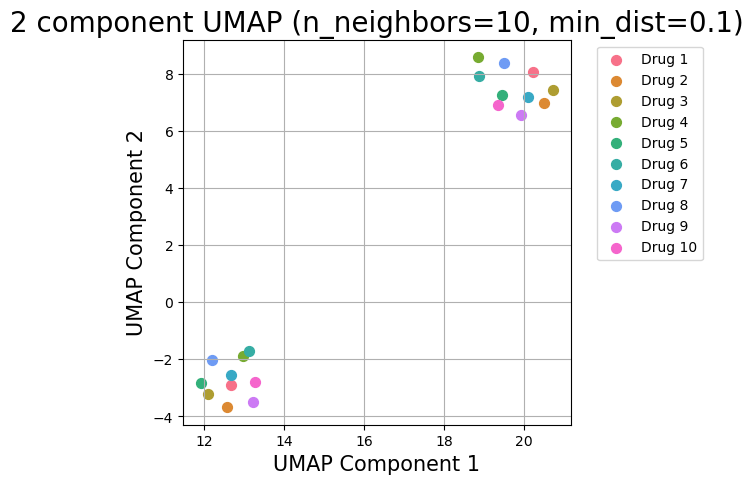

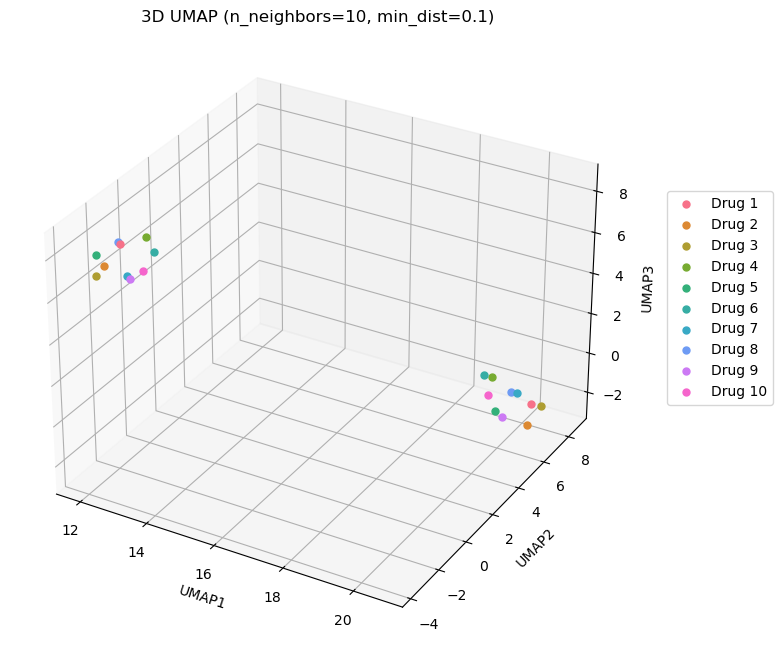

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from umap import UMAP  # Import UMAP

# import sample
data = pd.read_csv("dropped_correlation.csv")
data.drop('Unnamed: 0', inplace=True, axis=1)
# convert dictionary into a dataframe
test = pd.DataFrame(data)

test = test.head(10)  # keep only the first ten rows to play around with
test.insert(0, 'Treatment', ['Drug ' + str(i) for i in range(1, 11)])

# create a very similar dataset that is off by a random small amount in each row
random_shifts = np.random.uniform(-1, 1, size=data.head(10).shape)
alt_test = data.head(10) + random_shifts

# Set n_neighbors based on the dataset size
n_neighbors_value = min(10, data.shape[0] - 1)

# start with 2D renders
umap_model = UMAP(n_components=3, n_neighbors=n_neighbors_value, min_dist=0.1, metric='correlation', n_jobs=1, random_state=42)
comps = umap_model.fit_transform(data.head(10))
comps = pd.DataFrame(comps, columns=['UMAP1', 'UMAP2', 'UMAP3'])
comps.insert(0, 'Treatment', ['Drug ' + str(i) for i in range(1, 11)])

alt_comps = umap_model.fit_transform(alt_test)
alt_comps = pd.DataFrame(alt_comps, columns=['UMAP1', 'UMAP2', 'UMAP3'])
alt_comps.insert(0, 'Treatment', ['Drug ' + str(i) for i in range(1, 11)])

# concatenate into one table
results = pd.concat([comps, alt_comps], axis=0, ignore_index=True)

targets = ['Drug ' + str(i) for i in range(1, 11)]

# Use seaborn color palette for better variation
colors = sns.color_palette("husl", n_colors=len(targets))

# plot the UMAP components graph
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('UMAP Component 1', fontsize=15)
ax.set_ylabel('UMAP Component 2', fontsize=15)
ax.set_title(f'2 component UMAP (n_neighbors={n_neighbors_value}, min_dist=0.1)', fontsize=20)

for target, color in zip(targets, colors):
    indicesToKeep = comps['Treatment'] == target
    ax.scatter(comps.loc[indicesToKeep, 'UMAP1'],
               comps.loc[indicesToKeep, 'UMAP2'],
               color=color,
               s=50)
for target, color in zip(targets, colors):
    indicesToKeep = alt_comps['Treatment'] == target
    ax.scatter(alt_comps.loc[indicesToKeep, 'UMAP1'],
               alt_comps.loc[indicesToKeep, 'UMAP2'],
               color=color,
               s=50)
legend = ax.legend(targets)
legend.set_bbox_to_anchor((1.05, 1))
ax.grid()

# now plot in 3D
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

for target, color in zip(targets, colors):
    indicesToKeep = comps['Treatment'] == target
    ax.scatter(comps.loc[indicesToKeep, 'UMAP1'],
               comps.loc[indicesToKeep, 'UMAP2'],
               comps.loc[indicesToKeep, 'UMAP3'],
               color=color,
               s=25,
               marker='o')
for target, color in zip(targets, colors):
    indicesToKeep = comps['Treatment'] == target
    ax.scatter(alt_comps.loc[indicesToKeep, 'UMAP1'],
               alt_comps.loc[indicesToKeep, 'UMAP2'],
               alt_comps.loc[indicesToKeep, 'UMAP3'],
               color=color,
               s=25,
               marker='o')
legend = ax.legend(targets)
legend.set_bbox_to_anchor((1.25, 0.75))
ax.set_title(f'3D UMAP (n_neighbors={n_neighbors_value}, min_dist=0.1)', loc='center')
ax.set_xlabel('UMAP1', fontsize=10)
ax.set_ylabel('UMAP2', fontsize=10)
ax.set_zlabel('UMAP3', fontsize=10)

plt.show()

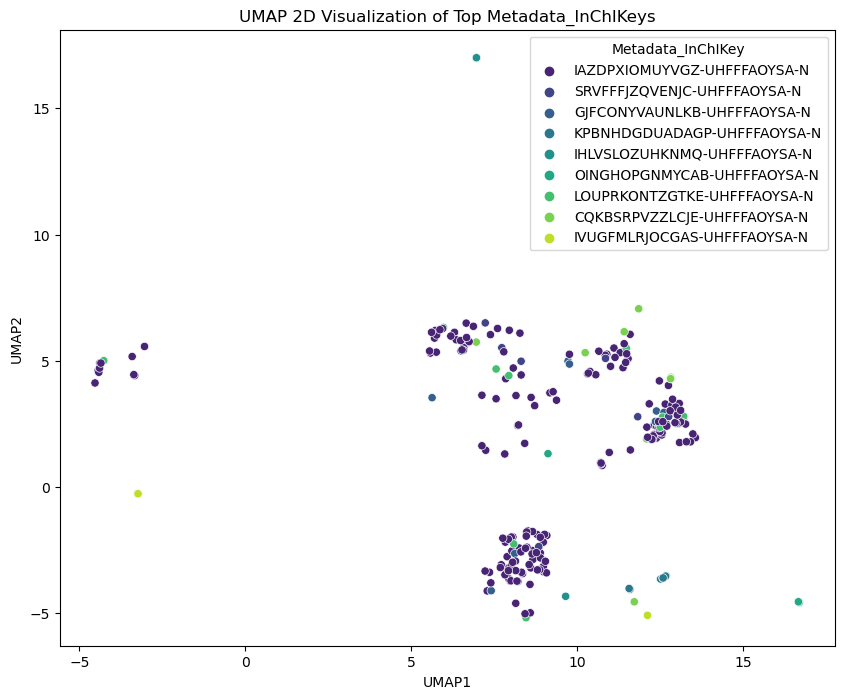

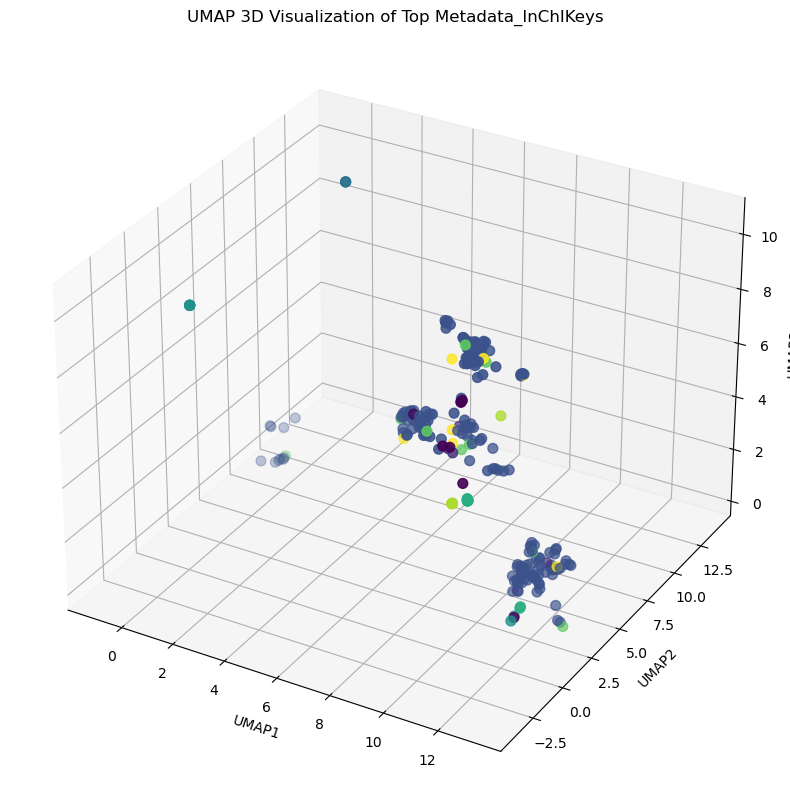

In [7]:
import pandas as pd
from umap import UMAP
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D  # Import for 3D plotting

# Assuming the file is on your desktop and named 'AK_data_labeled.csv'
desktop_path = '/Users/gaiadibernardini/Desktop/'
file_name = 'AK_data_labeled.csv'
data = pd.read_csv(desktop_path + file_name)

# Assuming 'Metadata_InChIKey' column contains the treatment information
Metadata_InChIKey = data['Metadata_InChIKey']

# Assuming other relevant columns are used for features
features = data.drop(['Metadata_InChIKey'], axis=1)

# Convert non-numeric columns to numeric or handle them appropriately
features_numeric = pd.get_dummies(features)  # Example: Convert categorical variables to dummy variables

# Create a UMAP model for 2D
umap_model_2d = UMAP(n_components=2, n_neighbors=5, min_dist=0.1)

# Fit and transform the data using UMAP for 2D
umap_result_2d = umap_model_2d.fit_transform(features_numeric)

# Add UMAP results back to the dataframe for 2D
umap_df_2d = pd.DataFrame(umap_result_2d, columns=['UMAP1', 'UMAP2'])
umap_df_2d['Metadata_InChIKey'] = Metadata_InChIKey

# Create a UMAP model for 3D
umap_model_3d = UMAP(n_components=3, n_neighbors=5, min_dist=0.1)

# Fit and transform the data using UMAP for 3D
umap_result_3d = umap_model_3d.fit_transform(features_numeric)

# Add UMAP results back to the dataframe for 3D
umap_df_3d = pd.DataFrame(umap_result_3d, columns=['UMAP1', 'UMAP2', 'UMAP3'])
umap_df_3d['Metadata_InChIKey'] = Metadata_InChIKey

# Find the top treatments that appear multiple times for 2D
top_Metadata_InChIKey_2d = umap_df_2d['Metadata_InChIKey'].value_counts().nlargest(9).index

# Filter the dataframe for the top treatments for 2D
umap_top_df_2d = umap_df_2d[umap_df_2d['Metadata_InChIKey'].isin(top_Metadata_InChIKey_2d)]

# Plot color-coordinated graphs for the top treatments in 2D
plt.figure(figsize=(10, 8))
sns.scatterplot(x='UMAP1', y='UMAP2', hue='Metadata_InChIKey', data=umap_top_df_2d, palette='viridis', legend='full')
plt.title('UMAP 2D Visualization of Top Metadata_InChIKeys')
plt.show()

# Find the top treatments that appear multiple times for 3D
top_Metadata_InChIKey_3d = umap_df_3d['Metadata_InChIKey'].value_counts().nlargest(9).index

# Filter the dataframe for the top treatments for 3D
umap_top_df_3d = umap_df_3d[umap_df_3d['Metadata_InChIKey'].isin(top_Metadata_InChIKey_3d)]

# Plot color-coordinated graphs for the top treatments in 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    umap_top_df_3d['UMAP1'],
    umap_top_df_3d['UMAP2'],
    umap_top_df_3d['UMAP3'],
    c=umap_top_df_3d['Metadata_InChIKey'].astype('category').cat.codes,
    cmap='viridis',
    s=50
)
ax.set_title('UMAP 3D Visualization of Top Metadata_InChIKeys')
ax.set_xlabel('UMAP1')
ax.set_ylabel('UMAP2')
ax.set_zlabel('UMAP3')
plt.show()


In [3]:
print(data.columns)

Index(['Metadata_Batch', 'Metadata_PlateType', 'Metadata_Plate',
       'Metadata_Source', 'Metadata_Well', 'Metadata_JCP2022',
       'Metadata_InChIKey', 'Control', 'Cells_AreaShape_Area',
       'Cells_AreaShape_Compactness',
       ...
       'Nuclei_Texture_InfoMeas1_RNA_5_03_256',
       'Nuclei_Texture_InfoMeas2_AGP_10_01_256',
       'Nuclei_Texture_InfoMeas2_AGP_3_00_256',
       'Nuclei_Texture_InfoMeas2_DNA_10_01_256',
       'Nuclei_Texture_InfoMeas2_DNA_3_00_256',
       'Nuclei_Texture_InfoMeas2_ER_10_01_256',
       'Nuclei_Texture_InfoMeas2_ER_3_00_256',
       'Nuclei_Texture_InfoMeas2_Mito_3_00_256',
       'Nuclei_Texture_InfoMeas2_RNA_10_01_256',
       'Nuclei_Texture_InfoMeas2_RNA_3_00_256'],
      dtype='object', length=972)
